In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from tabulate import tabulate
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
import seaborn as sns
import numpy as np

import joblib
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture
from sklearn.naive_bayes import GaussianNB

In [2]:
dfs = []
for i in range(0,3):
    filename = f"C:\\ProgramData\\anaconda3\\Lib\\site-packages\\pandas\\io\\parsers\\capstone\\part-0000{i}-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv"
    if i >=169 :
        filename = f"C:\\ProgramData\\anaconda3\\Lib\\site-packages\\pandas\\io\\parsers\\capstone\\part-0000{i}-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv"
    df_test = pd.read_csv("C:\\ProgramData\\anaconda3\\Lib\\site-packages\\pandas\\io\\parsers\\capstone\\part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv")
    df = pd.read_csv(filename)
    dfs.append(df)

In [3]:
dfs = []
for i in range(0,3):
    filename = f"C:\\ProgramData\\anaconda3\\Lib\\site-packages\\pandas\\io\\parsers\\capstone\\part-0000{i}-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv"
    if i >=10 :
        filename = f"C:\\ProgramData\\anaconda3\\Lib\\site-packages\\pandas\\io\\parsers\\capstone\\part-0000{i}-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv"
    df_test = pd.read_csv("C:\\ProgramData\\anaconda3\\Lib\\site-packages\\pandas\\io\\parsers\\capstone\\part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv")
    df = pd.read_csv(filename)
    dfs.append(df)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275258 entries, 0 to 275257
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    275258 non-null  float64
 1   Header_Length    275258 non-null  float64
 2   Protocol Type    275258 non-null  float64
 3   Duration         275258 non-null  float64
 4   Rate             275258 non-null  float64
 5   Srate            275258 non-null  float64
 6   Drate            275258 non-null  float64
 7   fin_flag_number  275258 non-null  float64
 8   syn_flag_number  275258 non-null  float64
 9   rst_flag_number  275258 non-null  float64
 10  psh_flag_number  275258 non-null  float64
 11  ack_flag_number  275258 non-null  float64
 12  ece_flag_number  275258 non-null  float64
 13  cwr_flag_number  275258 non-null  float64
 14  ack_count        275258 non-null  float64
 15  syn_count        275258 non-null  float64
 16  fin_count        275258 non-null  floa

C:\Users\hasan\AppData\Local\Temp\ipykernel_22608\1997688238.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df["label"].value_counts().index, rotation=45, ha='right')


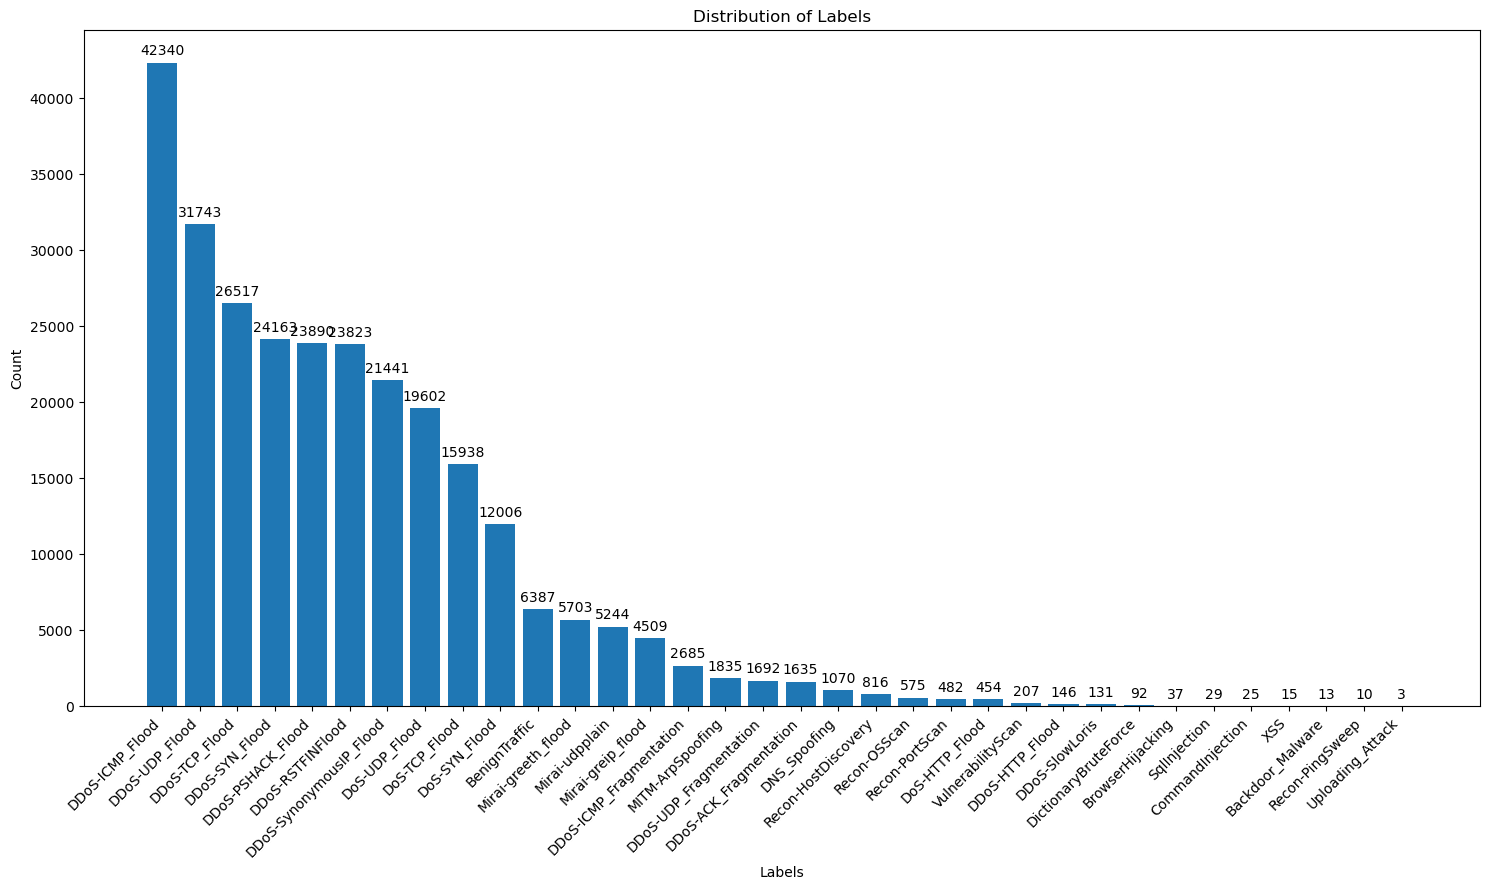

In [5]:
# Create graph column
fig, ax = plt.subplots(figsize=(15, 9))
bars = ax.bar(df["label"].value_counts().index, df["label"].value_counts().values, width=0.8)

# Rotate the label on the x-axis
ax.set_xticklabels(df["label"].value_counts().index, rotation=45, ha='right')

# Format the number on the y axis
ax.yaxis.set_major_formatter('{:.0f}'.format)

# Add labels and titles
ax.set_xlabel('Labels')
ax.set_ylabel('Count')
ax.set_title('Distribution of Labels')

# Show exact figures at the top of each column
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

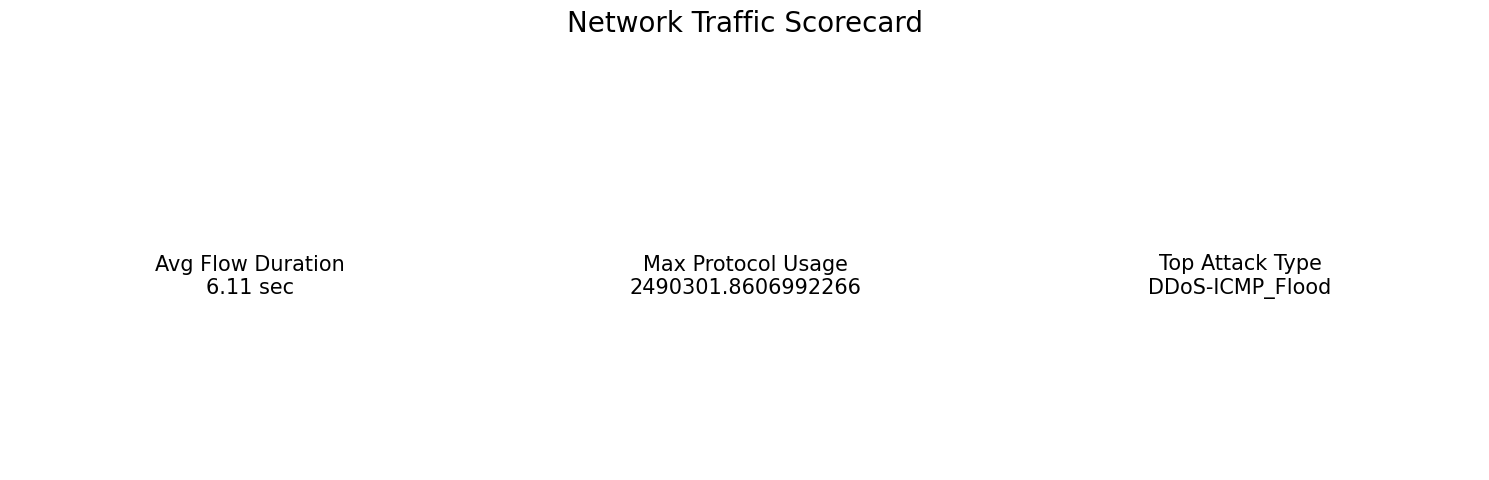

In [6]:
# Example metrics for the scorecard
average_flow_duration = df['flow_duration'].mean()
max_protocol_usage = df['Protocol Type'].sum().max()
top_attack_type = df['label'].value_counts().idxmax()

# Create the figure
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Network Traffic Scorecard', fontsize=20)

# Scorecard for Average Flow Duration
axs[0].text(0.5, 0.5, f'Avg Flow Duration\n{average_flow_duration:.2f} sec', fontsize=15, 
            ha='center', va='center')
axs[0].set_axis_off()

# Scorecard for Max Protocol Usage
axs[1].text(0.5, 0.5, f'Max Protocol Usage\n{max_protocol_usage}', fontsize=15, 
            ha='center', va='center')
axs[1].set_axis_off()

# Scorecard for Top Attack Type
axs[2].text(0.5, 0.5, f'Top Attack Type\n{top_attack_type}', fontsize=15, 
            ha='center', va='center')
axs[2].set_axis_off()

# Adjust the layout and display
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

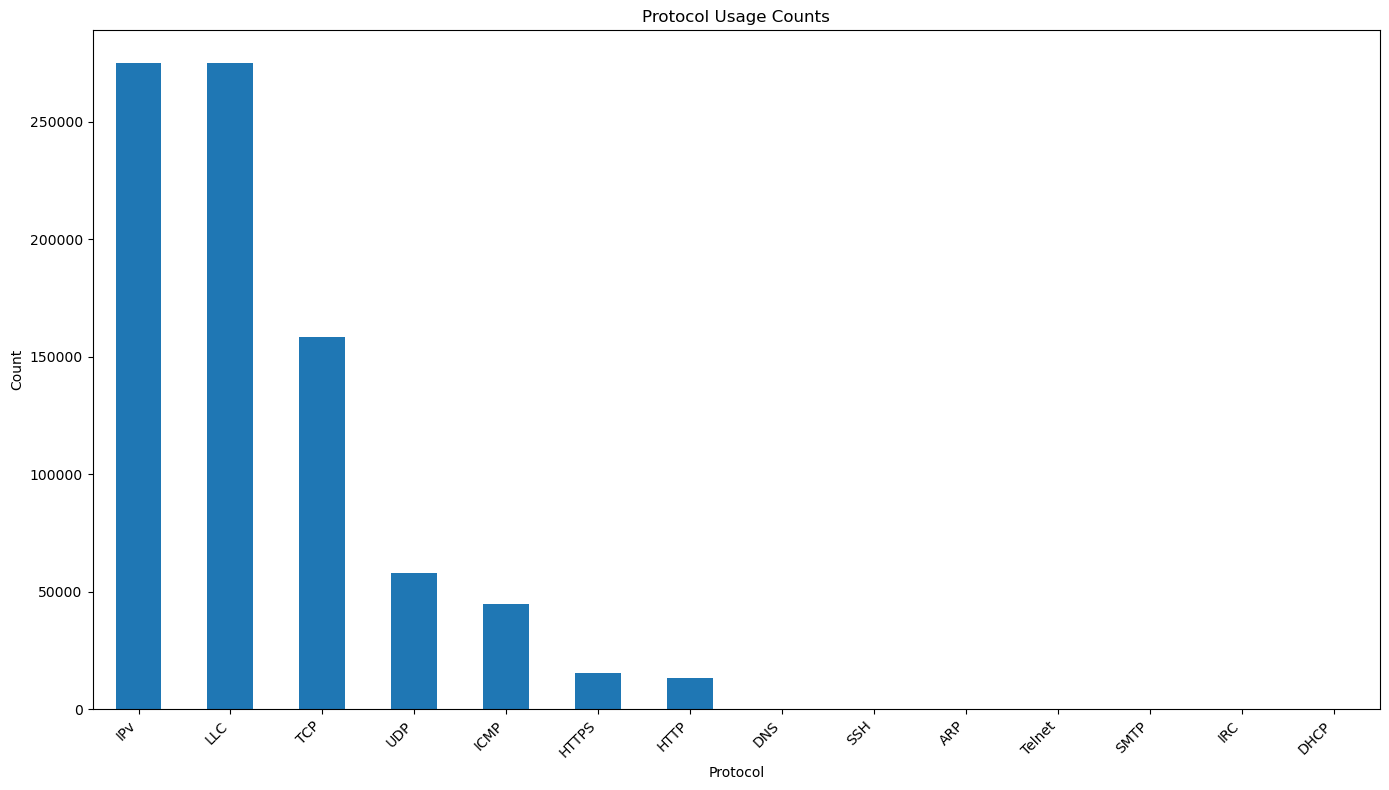

In [7]:
protocols = ['HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC']
protocol_counts = df[protocols].sum().sort_values(ascending=False)

# Now let's plot the protocol usage
plt.figure(figsize=(14, 8))
protocol_counts.plot(kind='bar')
plt.title('Protocol Usage Counts')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better fit
plt.tight_layout()  # Adjust layout
plt.show()

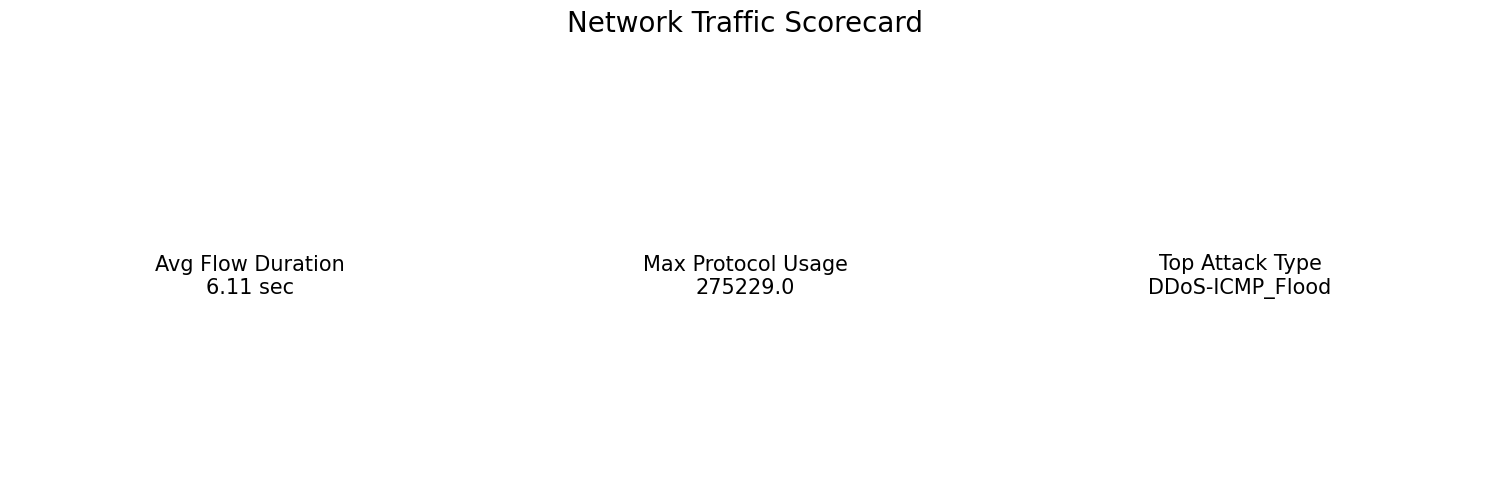

In [8]:
# Example metrics for the scorecard
average_flow_duration = df['flow_duration'].mean()
max_protocol_usage = df[protocols].sum().max()
top_attack_type = df['label'].value_counts().idxmax()

# Create the figure
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Network Traffic Scorecard', fontsize=20)

# Scorecard for Average Flow Duration
axs[0].text(0.5, 0.5, f'Avg Flow Duration\n{average_flow_duration:.2f} sec', fontsize=15, 
            ha='center', va='center')
axs[0].set_axis_off()

# Scorecard for Max Protocol Usage
axs[1].text(0.5, 0.5, f'Max Protocol Usage\n{max_protocol_usage}', fontsize=15, 
            ha='center', va='center')
axs[1].set_axis_off()

# Scorecard for Top Attack Type
axs[2].text(0.5, 0.5, f'Top Attack Type\n{top_attack_type}', fontsize=15, 
            ha='center', va='center')
axs[2].set_axis_off()

# Adjust the layout and display
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [9]:
def change_label(df):
  df.label.replace(['DDoS-ICMP_Flood','DDoS-UDP_Flood','DDoS-TCP_Flood','DDoS-PSHACK_Flood','DDoS-SYN_Flood','DDoS-RSTFINFlood','DDoS-SynonymousIP_Flood','DDoS-ICMP_Fragmentation','DDoS-UDP_Fragmentation','DDoS-ACK_Fragmentation','DDoS-HTTP_Flood','DDoS-SlowLoris'],'DDos',inplace=True)
  df.label.replace(['DoS-UDP_Flood','DoS-TCP_Flood','DoS-SYN_Flood','DoS-HTTP_Flood'],'DoS',inplace=True)      
  df.label.replace(['Recon-HostDiscovery','Recon-OSScan','Recon-PortScan','Recon-PingSweep','VulnerabilityScan'],'Recon',inplace=True)
  df.label.replace(['MITM-ArpSpoofing','DNS_Spoofing'],'Spoofing',inplace=True)
  df.label.replace(['DictionaryBruteForce'],'BruteForce',inplace=True)
  df.label.replace(['BrowserHijacking','XSS','Uploading_Attack','SqlInjection','CommandInjection','Backdoor_Malware'],'Web-based',inplace=True)
  df.label.replace(['Mirai-greeth_flood','Mirai-udpplain','Mirai-greip_flood'],'Mirai',inplace=True)
  df.label.replace(['BenignTraffic'],'BENIGN',inplace=True)
change_label(df)
change_label(df_test)

C:\Users\hasan\AppData\Local\Temp\ipykernel_22608\4207800703.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.label.replace(['DDoS-ICMP_Flood','DDoS-UDP_Flood','DDoS-TCP_Flood','DDoS-PSHACK_Flood','DDoS-SYN_Flood','DDoS-RSTFINFlood','DDoS-SynonymousIP_Flood','DDoS-ICMP_Fragmentation','DDoS-UDP_Fragmentation','DDoS-ACK_Fragmentation','DDoS-HTTP_Flood','DDoS-SlowLoris'],'DDos',inplace=True)


In [10]:
df_DDOS = df[df['label'].isin(['DDos', 'BENIGN'])]
df_DDOS_test = df_test[df_test['label'].isin(['DDos', 'BENIGN'])]

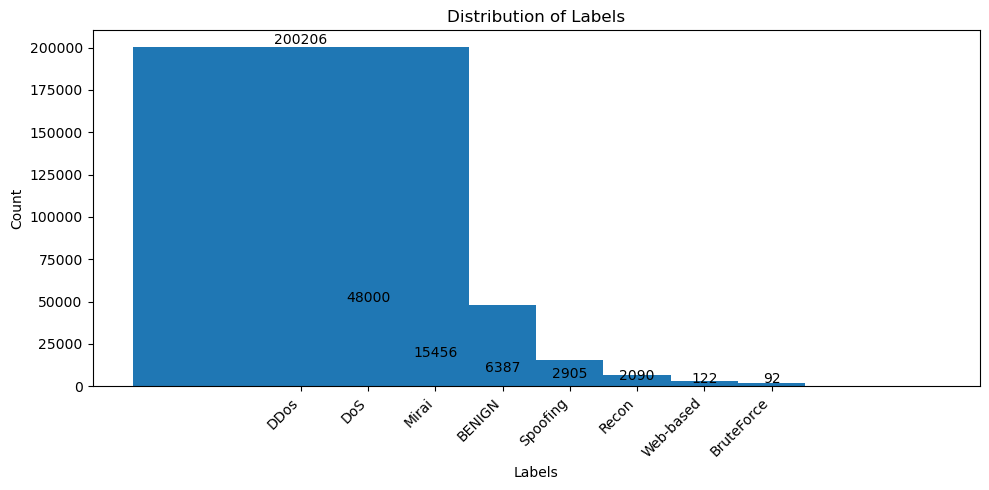

In [11]:
x_label_distribute = np.array(
   df["label"].value_counts().index.tolist())
y_label_distribute = np.array(
    df["label"].value_counts().values.tolist())

# Create a new Figure with dimensions 10 wide and 5 high
fig = plt.figure(figsize=(10, 5))

# Draw a column chart and display exact figures on top of each column
bars = plt.bar(x_label_distribute, y_label_distribute, width=5,
               align='center')
plt.bar_label(bars, label_type='edge', fontsize=10)

# Rotate the label on the x-axis
plt.xticks(rotation=45, ha='right')

# Format the number on the y-axis
plt.gca().yaxis.set_major_formatter('{:.0f}'.format)

# Add labels and titles
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels')
plt.tight_layout()

plt.show()


In [13]:
# Scale data will convert scale data or data format to the same range to avoid too large data affecting the model
# Scale data for each numeric feature with the train dataset
# Scale using MinMaxScaler to avoid negative values
# Here we only need to scale numeric features and numeric attributes because only numeric attributes have a large range
def scaleStandardData(dataFrame, numeric_cols):
  scaler = preprocessing.StandardScaler()
  for col in numeric_cols:
    arr = dataFrame[col]
    arr = np.array(arr)
    dataFrame[col] = scaler.fit_transform(arr.reshape(len(arr),1))
  return dataFrame

def scaleMinMaxData(dataFrame, numeric_cols):
  scaler = preprocessing.MinMaxScaler()
  for col in numeric_cols:
    arr = dataFrame[col]
    arr = np.array(arr)
    dataFrame[col] = scaler.fit_transform(arr.reshape(len(arr),1))
  return dataFrame

def scaleData(dataFrame, numeric_cols):
  dataFrame = scaleStandardData(dataFrame, numeric_cols)
  dataFrame = scaleMinMaxData(dataFrame, numeric_cols)
  return dataFrame

In [14]:
Y_TRAIN = df_DDOS['label']
Y_TEST = df_DDOS_test['label']
X_TRAIN = df_DDOS.drop('label', axis=1).copy()
X_TEST = df_DDOS_test.drop('label', axis=1).copy()


In [15]:
Y_TRAIN = Y_TRAIN.replace({'BENIGN': 0, 'DDos': 1,'DoS':2,'Mirai':3,'Spoofing':4,'Recon':5,'Web-based':6,'BruteForce':7})
Y_TEST = Y_TEST.replace({'BENIGN': 0, 'DDos': 1,'DoS':2,'Mirai':3,'Spoofing':4,'Recon':5,'Web-based':6,'BruteForce':7})

C:\Users\hasan\AppData\Local\Temp\ipykernel_22608\2475121519.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y_TRAIN = Y_TRAIN.replace({'BENIGN': 0, 'DDos': 1,'DoS':2,'Mirai':3,'Spoofing':4,'Recon':5,'Web-based':6,'BruteForce':7})
C:\Users\hasan\AppData\Local\Temp\ipykernel_22608\2475121519.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y_TEST = Y_TEST.replace({'BENIGN': 0, 'DDos': 1,'DoS':2,'Mirai':3,'Spoofing':4,'Recon':5,'Web-based':6,'BruteForce':7})


In [16]:
numeric_features = X_TRAIN.select_dtypes(include='number').columns
# Scale for common data
X_TRAIN = scaleData(X_TRAIN, numeric_features)

In [17]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
rfe = RFE(estimator=clf, n_features_to_select=30, step=1)
rfe.fit(X_TRAIN, Y_TRAIN.astype(int))
X_rfeTrain=rfe.transform(X_TRAIN)
true=rfe.support_
rfecolindex_train=[i for i, x in enumerate(true) if x]
rfecolname_train=list(numeric_features[i] for i in rfecolindex_train)
X_TRAIN.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
1,0.000000,0.000000,0.058824,0.259109,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.499164,0.607143,1.734723e-17,0.000000,0.000000e+00,0.00,0.57697
2,0.000001,0.001820,1.000000,0.259109,6.518469e-04,6.518469e-04,0.0,0.0,0.0,0.0,...,0.001464,0.000000,0.001528,0.499032,0.607143,8.974489e-03,0.000000,0.000000e+00,0.00,0.57697
5,0.000000,0.000006,0.352941,0.259109,5.202505e-06,5.202505e-06,0.0,1.0,0.0,1.0,...,0.002196,0.000000,0.002291,0.500485,0.607143,1.319170e-02,0.000000,0.000000e+00,0.00,0.57697
6,0.000000,0.000000,0.058824,0.259109,3.698556e-07,3.698556e-07,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.499195,0.607143,1.734723e-17,0.000000,0.000000e+00,0.00,0.57697
7,0.000002,0.000023,0.061765,0.258907,1.548798e-06,1.548798e-06,0.0,0.0,0.0,0.0,...,0.000039,0.000116,0.000046,0.499343,0.607143,2.457136e-04,0.000116,1.131949e-07,0.12,0.57697


In [18]:
rfe.fit(X_TRAIN, Y_TRAIN.astype(int))
X_rfeTrain=rfe.transform(X_TRAIN)
true=rfe.support_
rfecolindex_train=[i for i, x in enumerate(true) if x]
rfecolname_train=list(numeric_features[i] for i in rfecolindex_train)
print('Features selected for Train:',rfecolname_train)

Features selected for Train: ['ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight']


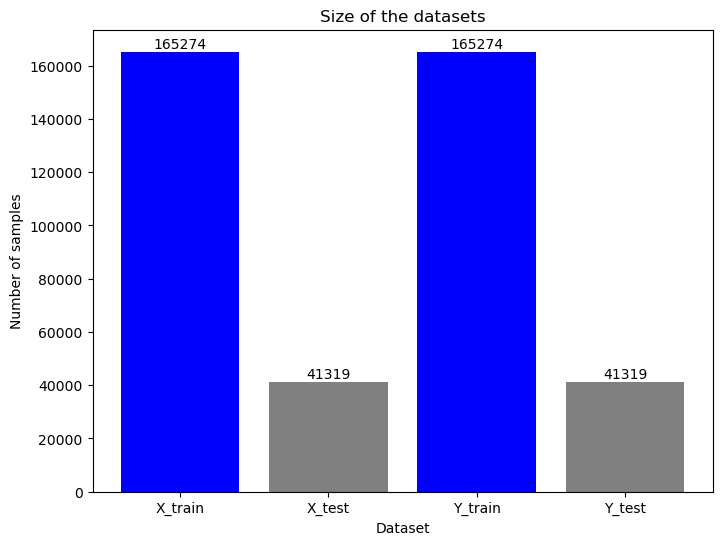

In [19]:
# List of selected important features
selected_features = ['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'syn_flag_number', 'psh_flag_number', 'ack_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'UDP', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight']

# Select important features from the training set
X_rfeTrain = X_TRAIN.loc[:, selected_features]
X_TEST = X_TEST.loc[:, selected_features]
X_train, X_test, Y_train, Y_test = train_test_split(X_rfeTrain, Y_TRAIN, test_size=0.2, random_state=42)
# Data set size
sizes = [X_train.shape[0], X_test.shape[0], Y_train.shape[0], Y_test.shape[0]]
labels = ['X_train', 'X_test', 'Y_train', 'Y_test']

# Draw a column chart
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, sizes, color=['blue', 'grey', 'blue', 'grey'])
plt.xlabel('Dataset')
plt.ylabel('Number of samples')
plt.title('Size of the datasets')

# Display data at the top of the column
for bar, size in zip(bars, sizes):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(size), ha='center', va='bottom', fontsize=10)

plt.show()

In [20]:
print(X_train.shape)
print(X_TEST.shape)
print(Y_train.shape)
print(Y_test.shape)

(165274, 30)
(179377, 30)
(165274,)
(41319,)


In [21]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier

# Load and prepare data



# Initialize LightGBM with adjusted parameters for stability
lgbm = LGBMClassifier(
    random_state=42,
    n_estimators=50,  # Reduced for faster computation
    learning_rate=0.1,
    
    verbose=-1
)# Train final model with selected features
final_model = LGBMClassifier(
    random_state=42,
    n_estimators=100,
    learning_rate=0.05
)
final_model.fit(X_train, Y_train)

# Evaluate model
Y_pred = final_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 160151, number of negative: 5123
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5172
[LightGBM] [Info] Number of data points in the train set: 165274, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.969003 -> initscore=3.442377
[LightGBM] [Info] Start training from score 3.442377

Model Accuracy: 0.9999
